# Anime Recommendation System using Pearson Correlation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Load the datasets

* 2 different datasets will be loaded in to dataframes 
* Dataset can be downloaded in https://www.kaggle.com/CooperUnion/anime-recommendations-database

In [2]:
anime = pd.read_csv('datasets/anime.csv')
rating = pd.read_csv('datasets/rating.csv')

### anime.csv

* anime_id - myanimelist.net's unique id identifying an anime.
* name - full name of anime.
* genre - comma separated list of genres for this anime.
* type - movie, TV, OVA, etc.
* episodes - how many episodes in this show. (1 if movie).
* rating - average rating out of 10 for this anime.
* members - number of community members that are in this anime's "group".

### rating.csv

* user_id - non identifiable randomly generated user id.
* anime_id - the anime that this user has rated.
* rating - rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating).

In [3]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [4]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [5]:
print('anime.csv (shape):',anime.shape)
print('rating.csv (shape):',rating.shape)

anime.csv (shape): (12294, 7)
rating.csv (shape): (7813737, 3)


In [6]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [7]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [8]:
# checking for null values

anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [9]:
# filling all anime without rating with 0

anime.fillna({'rating':0},inplace=True)

# Exploratory Data Analysis

* Distribution of anime type
* Anime with highest rating counts
* Movie and TV ratings
* Number of episodes and rating
* Number of ratings given by the user
* Anime rating count

### Distribution of anime type

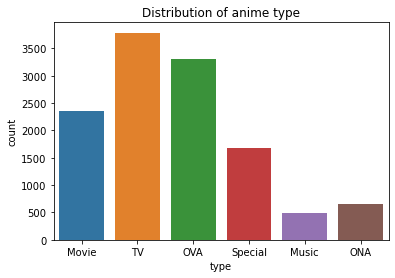

In [10]:
sns.countplot(x='type',data=anime)
plt.title('Distribution of anime type')
plt.show()

We can see from the chart the different types of anime present in the dataset.

### Anime with highest rating counts

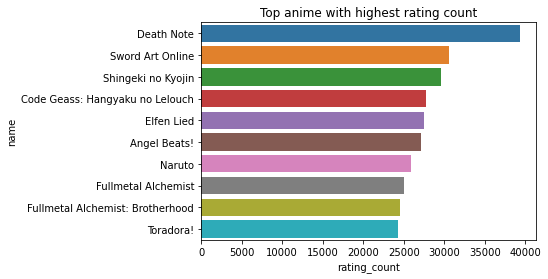

In [11]:
top_anime_rating_count = rating.groupby(by='anime_id').count()['rating'].sort_values(ascending=False).head(10)
top_anime_rating_count = pd.DataFrame({'rating_count':top_anime_rating_count}).reset_index()
top_anime_rating = pd.merge(top_anime_rating_count,anime,on='anime_id')

plt.title("Top anime with highest rating count")
sns.barplot(x='rating_count',y='name',data=top_anime_rating,orient='h')
plt.show()

The anime 'Death Note' has the highest rating count with almost 40000 ratings.

### Movie and TV ratings

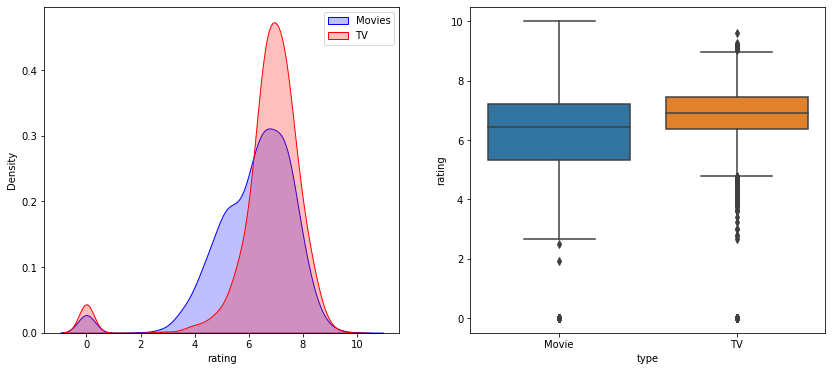

In [12]:
fig,ax = plt.subplots(ncols=2,figsize=(14,6))

sns.kdeplot(x='rating',color='b',shade=True,data=anime[(anime['type']=='Movie')],label='Movies',ax=ax[0])
sns.kdeplot(x='rating',color='r',shade=True,data=anime[(anime['type']=='TV')],label='TV',ax=ax[0])
sns.boxplot(x='type',y='rating',data=anime[(anime['type']=='Movie')|(anime['type']=='TV')],ax=ax[1])
ax[0].legend()
plt.show()

We can see that the ratings in movies are more spread out than ratings in TV

### Number of episodes(TV) and rating

In [13]:
# we will only get the episodes for anime series in TV

episodes_rating = anime[(anime['episodes']!='Unknown')&(anime['type']=='TV')].astype({'episodes':int})

# we can see that there are outliers present
# for the sake of visualization, we will only consider anime with below 100 episodes

episodes_rating['episodes'].describe()

count    3578.000000
mean       35.915595
std        80.640355
min         2.000000
25%        12.000000
50%        24.000000
75%        39.000000
max      1818.000000
Name: episodes, dtype: float64

In [14]:
episodes_rating_filtered = episodes_rating[episodes_rating['episodes']<100]

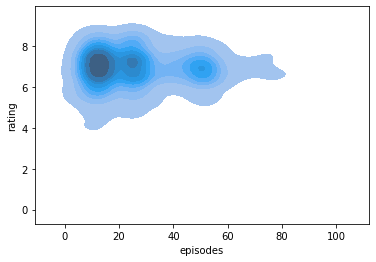

In [15]:
sns.kdeplot(x='episodes', y='rating',data=episodes_rating_filtered,shade=True)
plt.show()

We can see that most of the anime with episodes ranging 10-20,20-30 and 45-55 receives a rating of around 7.

### Number of ratings given by the user

In [16]:
user_rating_count = rating.groupby(by='user_id').count()['anime_id']
user_rating_count.describe()

count    73515.000000
mean       106.287656
std        153.086558
min          1.000000
25%         18.000000
50%         57.000000
75%        136.000000
max      10227.000000
Name: anime_id, dtype: float64

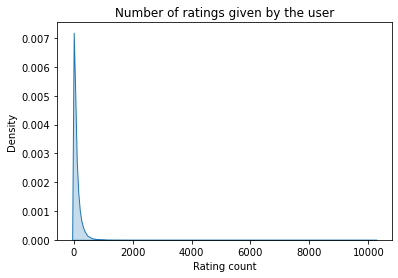

In [17]:
sns.kdeplot(x=user_rating_count,shade=True)
plt.title('Number of ratings given by the user')
plt.xlabel("Rating count")
plt.show()

We can see that most users gave ratings around 250 anime

### Anime rating count

In [18]:
anime_rating_count = rating.groupby(by='anime_id').count()['user_id']
anime_rating_count.describe()

count    11200.000000
mean       697.655089
std       2028.627749
min          1.000000
25%          5.000000
50%         51.500000
75%        385.250000
max      39340.000000
Name: user_id, dtype: float64

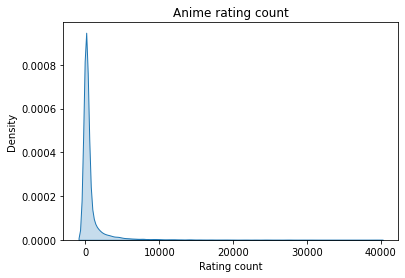

In [19]:
sns.kdeplot(x=anime_rating_count,shade=True)
plt.title('Anime rating count')
plt.xlabel("Rating count")
plt.show()

We can see that most anime have rating count below 500

# Collaborative Filtering using Pearson Correlation

<br>

```
* In this recommendation system, we will be utilizing the collaborative filtering technique.
* By using this technique, the system will recommend anime based on the correlation between the ratings of 
  the user's anime and the ratings of other anime.
* For example, I watched 10 anime and gave each of them a rating. Now, my friend watched an anime from my 
  anime list and now asks me to recommend three anime. With that, I will recommend three anime with closest 
  rating to the rating I gave for the anime that my friend watched.
```

### Process

<br>

```
* Remove anime with low count of ratings and users who gave low count of ratings
* Construct Rating Matrix
* Correlate user's anime with other anime based on ratings
* Output ten recommended anime
```

<br>

![collaborative-filtering](images/collaborative-filtering.png)

### Remove anime with low count of ratings and users who gave low count of ratings

* We will only consider popular anime (rating count over 250) and users who gave lots of rating on different anime (>100)

In [20]:
anime_rating_count = rating.groupby(by='anime_id').count()['rating'].reset_index().rename(columns={'rating':'rating_count'})
anime_rating_count['rating_count'].describe()

count    11200.000000
mean       697.655089
std       2028.627749
min          1.000000
25%          5.000000
50%         51.500000
75%        385.250000
max      39340.000000
Name: rating_count, dtype: float64

In [21]:
filtered_anime = anime_rating_count[anime_rating_count['rating_count']>250]

In [22]:
# anime with over 250 rating count

filtered_anime.head()

,anime_id,rating_count
0,1,15509
1,5,6927
2,6,11077
3,7,2629
4,8,413


In [23]:
user_rating_count = rating.groupby(by='user_id').count()['rating'].reset_index().rename(columns={'rating':'rating_count'})
user_rating_count['rating_count'].describe()

count    73515.000000
mean       106.287656
std        153.086558
min          1.000000
25%         18.000000
50%         57.000000
75%        136.000000
max      10227.000000
Name: rating_count, dtype: float64

In [24]:
# users who gave over 100 ratings to different anime

filtered_user = user_rating_count[user_rating_count['rating_count']>100]

In [25]:
filtered_user.head()

,user_id,rating_count
0,1,153
4,5,467
6,7,343
10,11,112
12,13,174


In [26]:
filtered_rating_anime = rating[rating['anime_id'].isin(filtered_anime['anime_id'])]
filtered_rating = filtered_rating_anime[filtered_rating_anime['user_id'].isin(filtered_user['user_id'])]

In [27]:
# this dataset now contains popular anime and users wth high rating counts

filtered_rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


### Construct Rating Matrix

* We will construct a matrix by using pivot table wherein users will be indexes and anime in columns

In [28]:
# we can see that most of the values are zero since most of the users does not have ratings for every anime

rating_matrix = filtered_rating.pivot_table(index='user_id',columns='anime_id',values='rating').fillna(0)
print(rating_matrix.shape)
rating_matrix.head()

(24676, 3318)


anime_id,1,5,6,7,8,15,16,17,18,19,...,33142,33161,33201,33222,33338,33421,33524,33558,34103,34240
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,8.0,0.0,0.0,6.0,0.0,6.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Correlate user's anime with other anime based on ratings

In [29]:
user_anime = anime[anime['name']=='Bleach']
user_anime

,anime_id,name,genre,type,episodes,rating,members
582,269,Bleach,"Action, Comedy, Shounen, Super Power, Supernat...",TV,366,7.95,624055


In [30]:
user_anime_ratings = rating_matrix[int(user_anime['anime_id'])]

In [31]:
correlated_anime = rating_matrix.corrwith(user_anime_ratings).reset_index().rename(columns={0:'Correlation'})
correlated_anime.head()

,anime_id,Correlation
0,1,0.025858
1,5,-0.015649
2,6,0.072838
3,7,0.000795
4,8,0.042133


### Output ten recommended anime

In [32]:
recommended_anime = correlated_anime.sort_values(by='Correlation',ascending=False).head(11).iloc[1:]

In [33]:
pd.merge(recommended_anime,anime,on='anime_id',how='left').drop(columns=['anime_id','Correlation'])

,name,genre,type,episodes,rating,members
0,Bleach Movie 4: Jigoku-hen,"Action, Comedy, Shounen, Super Power, Supernat...",Movie,1,7.75,94074
1,Bleach Movie 3: Fade to Black - Kimi no Na wo ...,"Action, Comedy, Shounen, Super Power, Supernat...",Movie,1,7.66,122373
2,Fairy Tail,"Action, Adventure, Comedy, Fantasy, Magic, Sho...",TV,175,8.22,584590
3,Bleach Movie 2: The DiamondDust Rebellion - Mo...,"Action, Adventure, Shounen, Supernatural",Movie,1,7.60,134739
4,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
5,Bleach Movie 1: Memories of Nobody,"Action, Adventure, Super Power",Movie,1,7.58,151598
6,Ao no Exorcist,"Action, Demons, Fantasy, Shounen, Supernatural",TV,25,7.92,583823
7,Beelzebub,"Action, Comedy, Demons, School, Shounen, Super...",TV,60,8.04,217752
8,Katekyo Hitman Reborn!,"Action, Comedy, Shounen, Super Power",TV,203,8.37,258103
9,Bleach: Memories in the Rain,"Action, Adventure, Drama, Shounen, Supernatural",Special,1,7.21,78111


# Saving dataframes

* Save anime list
* Save rating matrix by converting it to csr matrix

In [34]:
# anime list

anime_to_save = pd.merge(filtered_anime,anime,on='anime_id',how='left').sort_values(by='rating',ascending=False)
anime_to_save.to_pickle('output/anime_list.pickle')

In [35]:
anime_list_open = pd.read_pickle('output/anime_list.pickle')
anime_list_open.head()

,anime_id,rating_count,name,genre,type,episodes,rating,members
3275,32281,2199,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1543,5114,24574,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
3091,28977,1386,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
1969,9253,19283,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
2052,9969,3673,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [36]:
# converting sparse matrix to csr matrix to save memory

from scipy.sparse import csr_matrix, save_npz, load_npz
import json

In [37]:
csr_rating_matrix =  csr_matrix(rating_matrix.values)
save_npz('output/csr_rating_matrix.npz', csr_rating_matrix)

In [38]:
# saving rating matrix columns and indices

anime_id = {
    'anime_id': rating_matrix.columns.to_list()
}

user_id = {
    'user_id': rating_matrix.index.to_list()
}


with open("output/rating_matrix_anime_id.json","w") as f:
    f.write(json.dumps(anime_id))
with open("output/rating_matrix_user_id.json","w") as f:
    f.write(json.dumps(user_id))

In [39]:
csr_rating_matrix_open = load_npz('output/csr_rating_matrix.npz')

with open('output/rating_matrix_anime_id.json') as f:
    anime_id = json.load(f)
with open('output/rating_matrix_user_id.json') as f:
    user_id = json.load(f)

In [40]:
pd.DataFrame(csr_rating_matrix_open.toarray(),index=user_id['user_id'],columns=anime_id['anime_id']).head()

,1,5,6,7,8,15,16,17,18,19,...,33142,33161,33201,33222,33338,33421,33524,33558,34103,34240
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,8.0,0.0,0.0,6.0,0.0,6.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
